General review:

https://genomebiology.biomedcentral.com/articles/10.1186/gb-2003-4-4-210

(doi:10.1186/gb-2003-4-4-210)

## Subtask 0: Download the data

hint:

http://science.sciencemag.org/highwire/filestream/680254/field_highwire_adjunct_files/5/aad0189_DataFileS5.xlsx

In [1]:
import urllib
import numpy as np

In [2]:
urllib.urlretrieve("http://science.sciencemag.org/highwire/filestream/680254/field_highwire_adjunct_files/5/aad0189_DataFileS5.xlsx", 
                   "data/microarray.xlsx")

('data/microarray.xlsx', <httplib.HTTPMessage instance at 0x00000000040D1DC8>)

## Task 1: Data wrangling

hint:

http://www.arrayanalysis.org/main.html

### Subtask 1.1: Read in aad0189_DataFileS5.xlsx with pandas

In [3]:
import pandas as pd

In [4]:
microarray_data = pd.read_excel("data/microarray.xlsx", na_values='x', header=2)

In [5]:
microarray_data.head()

,Original_Order,MATCH_ORDER,Gene,Probeset,Gene.1,Protein,Unnamed: 6,Range CD,Range HFD,Range_All,...,BXD89_Liver_HFD,BXD90_Liver_HFD,BXD95_Liver_HFD,BXD96_Liver_HFD,BXD97_Liver_HFD,BXD98_Liver_HFD,BXD99_Liver_HFD,BXD100_Liver_HFD,BXD101_Liver_HFD,BXD103_Liver_HFD
0,12643,NaN,Igh,10403036,Igh,0,NaN,1.495886,1.720705,1.720705,...,4.959,5.483,5.347,5.087,5.125,5.160,5.020,5.170,4.775,4.982
1,12646,NaN,Igh,10403043,Igh,0,NaN,2.938337,1.988940,3.595021,...,7.415,7.252,7.547,7.358,7.424,7.447,7.567,7.732,7.365,7.369
2,12653,NaN,Igh,10403063,Igh,0,NaN,3.719220,1.859610,4.260433,...,6.665,6.948,6.999,6.974,6.886,6.876,7.027,7.093,6.748,6.771
3,8759,1458.0,Hcfc2,10365242,Hcfc2,A0AUN4,NaN,1.479388,1.465101,1.536875,...,9.177,9.021,8.803,8.928,8.914,8.838,9.056,8.924,8.945,8.865
4,18740,8191.0,Ccdc112,10458794,Ccdc112,A0AUP1,NaN,1.834008,1.943962,1.997229,...,6.623,6.371,6.187,6.310,6.448,6.531,6.167,6.401,6.470,6.565


### Subtask 1.2: Average over different probesets for a gene and generate a dataframe containing each gene symbol (once)  as rows and the corresponding averaged expression values for each strain + condition as columns

In [6]:
mean_values = microarray_data.groupby("Gene").mean()

In [7]:
mean_values.head()

,Original_Order,MATCH_ORDER,Probeset,Unnamed: 6,Range CD,Range HFD,Range_All,C57BL/6J_Liver_CD,DBA/2J_Liver_CD,BXD43_Liver_CD,...,BXD89_Liver_HFD,BXD90_Liver_HFD,BXD95_Liver_HFD,BXD96_Liver_HFD,BXD97_Liver_HFD,BXD98_Liver_HFD,BXD99_Liver_HFD,BXD100_Liver_HFD,BXD101_Liver_HFD,BXD103_Liver_HFD
Gene,,,,,,,,,,,,,,,,,,,,,
39872,31277.0,NaN,10572050.0,NaN,2.297397,1.496923,2.297397,7.864,7.180,7.067,...,7.538,7.707,7.491,7.923,7.601,7.780,7.597,7.679,7.666,7.725
39873,17826.0,NaN,10450025.0,NaN,1.458009,1.611049,1.611049,10.778,10.730,10.931,...,11.015,10.983,10.982,11.153,11.189,11.026,11.054,11.064,11.006,10.808
39874,18766.0,NaN,10458983.0,NaN,1.542211,1.588869,1.604362,7.527,7.754,7.533,...,7.581,7.488,7.554,7.461,7.592,7.425,7.410,7.539,7.388,7.334
39875,7705.0,NaN,10355474.0,NaN,1.718322,1.606588,1.772763,6.773,7.288,7.289,...,7.307,7.333,7.555,7.098,7.101,7.091,7.246,7.021,7.246,7.339
39876,19195.0,NaN,10462791.0,NaN,1.593280,1.705270,1.854461,11.095,11.272,11.690,...,11.360,11.447,11.450,11.136,11.382,11.390,11.561,11.031,11.189,11.204


### Subtask 1.3: Quantile normalization: carry out a quantile normalization of the data (or not)

#### Subsubtask 1.3.1: Implement a ratio intensity plot (using matplotlib)

In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt  
from statsmodels.nonparametric.smoothers_lowess import lowess

In [10]:
def ratio_intensity_plot(ratio_intens_data_df, sample1, sample2):
    ''' This function creates the ratio-intensity-plot for two series
    
        sample1: Series 1
        sample2: Series 2
    '''
    
    
    # get the expression data
    expr_sample_1 = ratio_intens_data_df[sample1]
    expr_sample_2 = ratio_intens_data_df[sample2]
    
    # calculate ratio and intensity
    R = np.log(expr_sample_1 / expr_sample_2)
    I = (np.log(expr_sample_1) + np.log(expr_sample_2))/2
    
    # plot intensity vs ratio
    plt.scatter(I,R)
    plt.axhline(color="red") 

#### Subsubtask 1.3.2: Apply your ratio intensity plot to several pairs of chips (columns of your above dataframe)

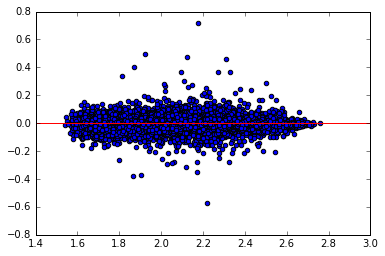

In [11]:
ratio_intensity_plot(mean_values, 'C57BL/6J_Liver_CD', 'BXD60_Liver_CD')

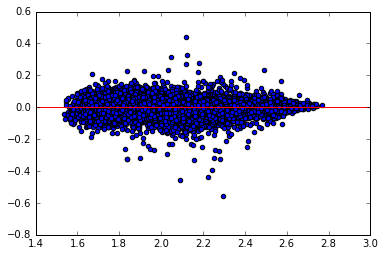

In [12]:
ratio_intensity_plot(mean_values, 'BXD103_Liver_CD', 'BXD97_Liver_CD')

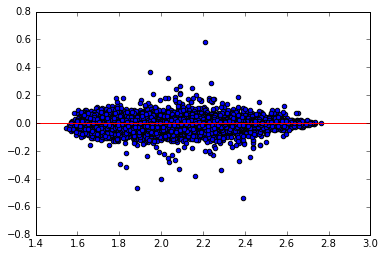

In [13]:
ratio_intensity_plot(mean_values, 'BXD73_Liver_HFD', 'BXD62_Liver_HFD')

#### Subsubtask 1.3.3: Implement a rle plot (rle = relative log expression)

In [14]:
import seaborn as sns

In [15]:
def rle_plot(rle_data, cols):
    ''' This function creates a rle plot (e.g. rle_plot(microarray_data, microarray_data.columns[10:15]) ) . 
    
        rle_data: dataframe containing the data
        cols: dataframe containing the columns 
    
    '''
    
    # for any gene calculate the median across all samples
    rle_data_median = rle_data[cols].stack().median()
    
    # for a given sample divide the expression values by the corresponding mean
    rle_data_boxplot = rle_data[cols] / rle_data_median
    
    # change size
    plt.figure(figsize=(20,10))
    
    plt.xticks(rotation=90)
    
    # for every sample plot a box plot
    sns.boxplot(data=np.log(rle_data_boxplot))
    


#### Subsubtask 1.3.4: Apply your RLE plot to the data

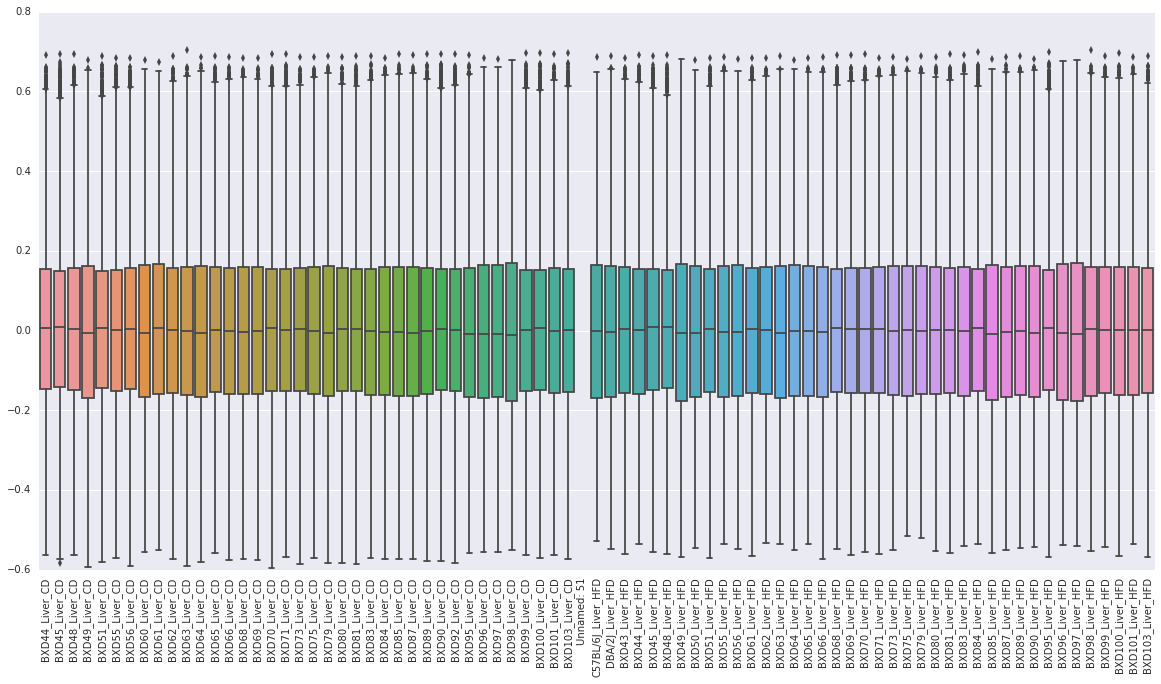

In [16]:
# microarray_data.columns[10:15]: the expression values start at column 10
rle_plot(mean_values, mean_values.columns[10:])

#### Subsubtask 1.3.5: If you consider it necessary, perform a quantile normalization of the data 

Normalization is not necessary, since the data is already normalized.

## Task 2: Which statistical test to chose?

We want to infer differentially expressed genes between the CD and the HFD condition. Therefore we (mis)(?)treat (!) the (already) normalized expression values of all the strains for a given condition as independent observations of the same sample. But first we need to figure out which statistical test for differential expression seems appropriate (concerning distribution and variance assumptions) and then apply it. Limit yourself to the Student t-test, the Welch t-test or Wilcoxon's rank-sum test (also sometimes refered to as Whitney-Mann U-test).

Everything you may need, is most likely found here:

http://docs.scipy.org/doc/scipy-0.17.1/reference/stats.html 

http://statsmodels.sourceforge.net/stable/graphics.html

### Subtask 2.1: Do the CD and HFD samples have equal variance?

Josef-Francisco Del-Marre-Doyle, famous and visionary president of the International BXD Society (IBXDS), just gave a celebrated TED-talk in which he reviewed the fact that any statistic associated with the universe is almost surely normally distributed, and hence you canonically assume that the only thing left to check is whether the samples have equal variance, that is whether to apply Student's or Welch's t-test. Josef-Francisco's assessment usually is that "things are equal" and so you're quite confident that you'll be able to use Student's t-test. But since you're an excellent scientist (and, additionally, won't pass the course otherwise) you still do the following certainly unnecessary work:

#### Subsubtask 2.1.1: Choose a random row of your latest dataframe using the random module of Python

In [17]:
from numpy import random

In [60]:
random_row = mean_values.iloc[np.random.randint(mean_values.shape[0])]
random_row.head()

Original_Order    1.881900e+04
MATCH_ORDER       8.238000e+03
Probeset          1.045955e+07
Unnamed: 6                 NaN
Range CD          1.712377e+00
Name: Spire1, dtype: float64

#### Subsubtask 2.1.2: Make a Q-Q plot comparing the two samples for the just chosen gene and answer the question: Does this tell you anything?

In [19]:
import scipy.stats as stats
import pylab 
import statsmodels.api as sm

In [20]:
# BXD92_Liver_CD exists only for CD -> remove it 
random_row_dropped = random_row.drop('BXD92_Liver_CD')

# get the CD and HFD expression values
sample_CD_expr_values = random_row_dropped[48:]
sample_HFD_expr_values = random_row_dropped[7:47]

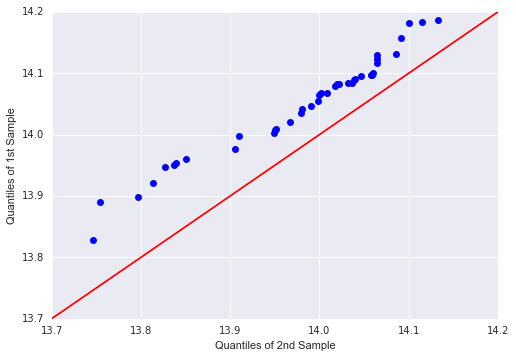

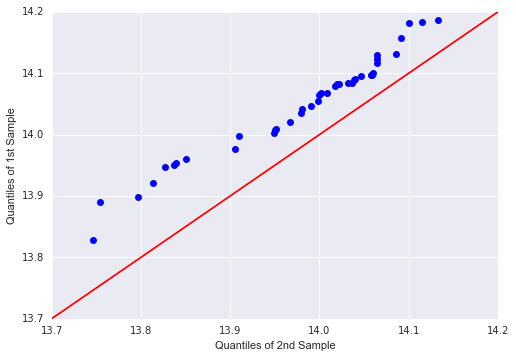

In [71]:
# qq plot for CD and HFD
sm.qqplot_2samples(sample_CD_expr_values, sample_HFD_expr_values, line='45')

#### Subsubtask 2.1.3: Apply an appropriate statistical test in order to figure out whether the samples have equal variance (there may be more than one sensible solution)

In [22]:
# apply bartlett test:
stats.bartlett(sample_CD_expr_values, sample_HFD_expr_values)

BartlettResult(statistic=1.4809872465476284, pvalue=0.22362012229033568)

#### Subsubtask 2.1.4: To asses the global situation, plot a histogram of p-values for all the genes (using the same test you chose in 2.1.3)

In [23]:
def global_test_equal_variance(data_df):
    ''' This function tests for equal variance for the given dataframe (= applies bartlett test to each row).
    
        data_df: the dataframe to test for
    
    '''
    
    # list to store the result
    list_of_p_values_ = []
    
    # iterate over the dataframe
    for row_ in data_df.index:
        
        # get the current row
        gene_ = microarray_data.loc[row_]
        
        # BXD92_Liver_CD exists only for CD -> remove it 
        gene_dropped = gene_.drop('BXD92_Liver_CD')

        # get the CD and HFD expression values
        sample_CD_expr_values_ = gene_dropped[51:]
        sample_HFD_expr_values_ = gene_dropped[10:50]
        
        # apply bartlett test:
        list_of_p_values_.append(stats.bartlett(sample_CD_expr_values_, sample_HFD_expr_values_)[1])
        
    return list_of_p_values_    
        

In [24]:
global_p_values = global_test_equal_variance(microarray_data)

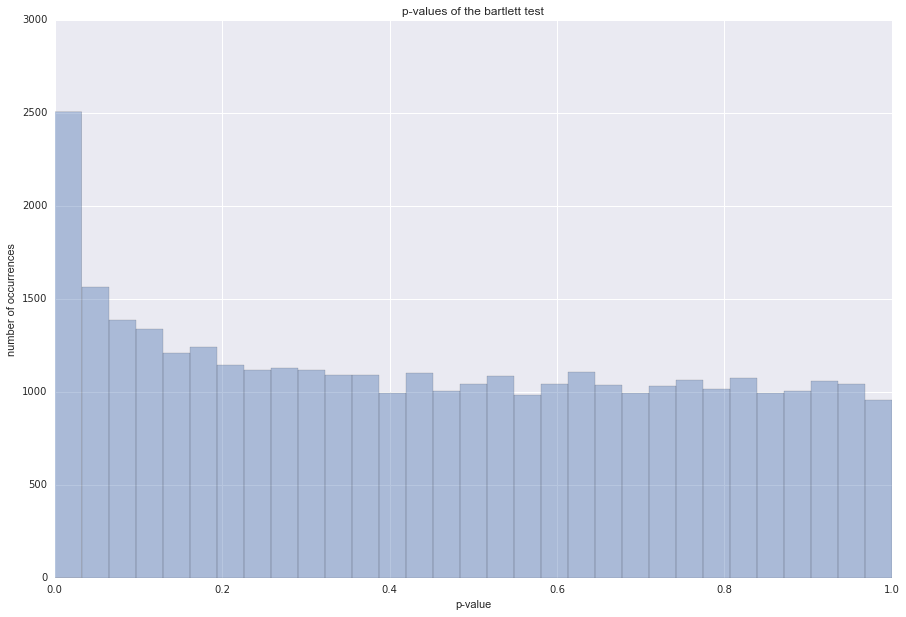

In [64]:
plt.figure(figsize=(15, 10))
plt.title('p-values of the bartlett test')
plt.xlabel('p-value')
plt.ylabel('number of occurrences')
sns.distplot(global_p_values, kde=False)

### Subtask 2.2 Are the CD and HFD samples normally distributed?

Utterly shocked and overwhelmed by ambiguous emotions you begin to doubt the wisdom of Josef-Francisco and start a top-secret and highly dangerous investigation whether the samples are at least normally distributed. Be careful whom you'll tell about that you're working on this...

#### Subsubtask 2.2.1: Using the same gene randomly chosen above, make a Box plot for the corresponding CD and HFD sample and give an interpretation

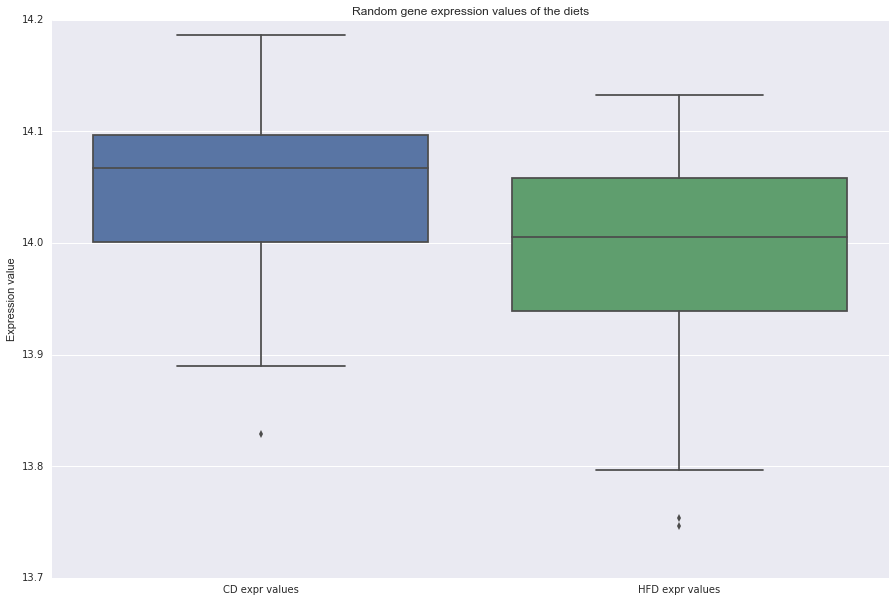

In [68]:
blubb = pd.DataFrame({"HFD expr values" : sample_HFD_expr_values, 
                     "CD expr values" : sample_CD_expr_values})
plt.figure(figsize=(15, 10))
plt.title('Random gene expression values of the diets')
plt.ylabel('Expression value')
sns.boxplot(data=blubb)

# Interpretation (depends on the random row..):
# The genes of the mice getting CD are on average stronger expressed than the genes of the mice getting CD. Also the 
# variance of CD is sligthly larger than the variance of HFD. 

#### Subsubtask 2.2.2: Just like in 2.2.1 make Q-Q plots for each sample (compare each to the theoretical normal distribution) and try an interpretation.

In [27]:
from scipy.stats import zscore

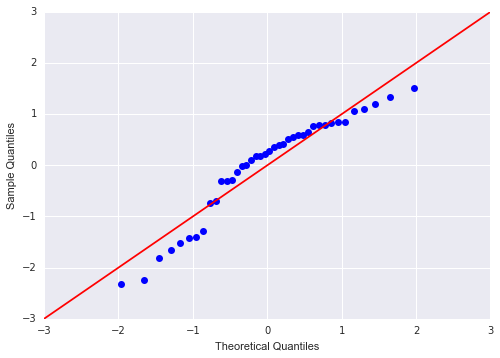

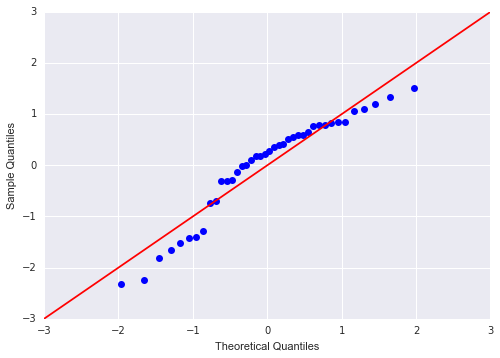

In [28]:
norm_BXD = zscore(sample_HFD_expr_values.dropna())
sm.qqplot(norm_BXD, line='45')

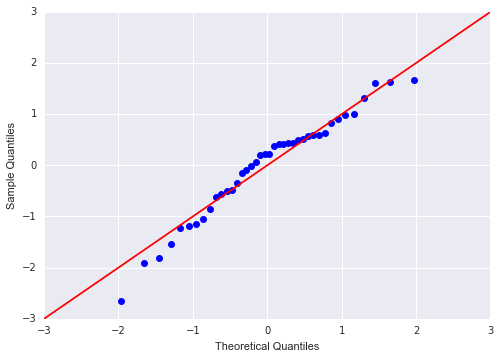

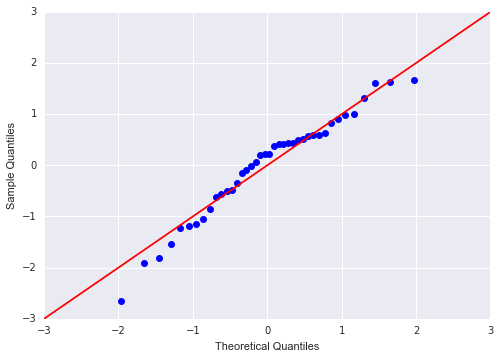

In [29]:
norm_CD = zscore(sample_CD_expr_values.dropna())
sm.qqplot(norm_CD, line='45')

#### Subsubtask 2.2.3: Apply an appropriate statistical test in order to figure out whether the samples are normally distributed (there may be more than one sensible solution)

In [30]:
# shapiro wilk test for HFD
stats.shapiro(sample_HFD_expr_values)

(0.915465235710144, 0.005561464931815863)

In [31]:
# shapiro wilk for CD
stats.shapiro(sample_CD_expr_values)

(0.961715579032898, 0.19164535403251648)

#### Subsubtask 2.2.4: To asses the global situation, plot a histogram of p-values for all the genes (using the same test you chose in 2.2.3)

In [32]:
def global_test_normal_distr(data_df_nd):
    ''' This function tests each row of the dataframe for normal distribution (=applies shapiro wilk test).
    
        data_df_nd: the dataframe to check for normal distribution
    
    '''
    
    # lists to store the result
    list_of_p_values_CD  = []
    list_of_p_values_HFD = []
    
    # iterate over the dataframe
    for row_nd in data_df_nd.index:
        
        # get the current row
        gene_nd = microarray_data.loc[row_nd]
        
        # BXD92_Liver_CD exists only for CD -> remove it 
        gene_nd_dropped = gene_nd.drop('BXD92_Liver_CD')

        # get the CD and BXD expression values
        sample_CD_expr_values_nd = gene_nd_dropped[51:]
        sample_HFD_expr_values_nd = gene_nd_dropped[10:50]
    
        # apply shapiro test:
        list_of_p_values_CD.append(stats.shapiro(sample_CD_expr_values_nd)[1])
        list_of_p_values_HFD.append(stats.shapiro(sample_HFD_expr_values_nd)[1])
        
    return list_of_p_values_CD, list_of_p_values_HFD 
        

In [33]:
normal_distr_CD_p_values, normal_distr_HFD_p_values = global_test_normal_distr(microarray_data)

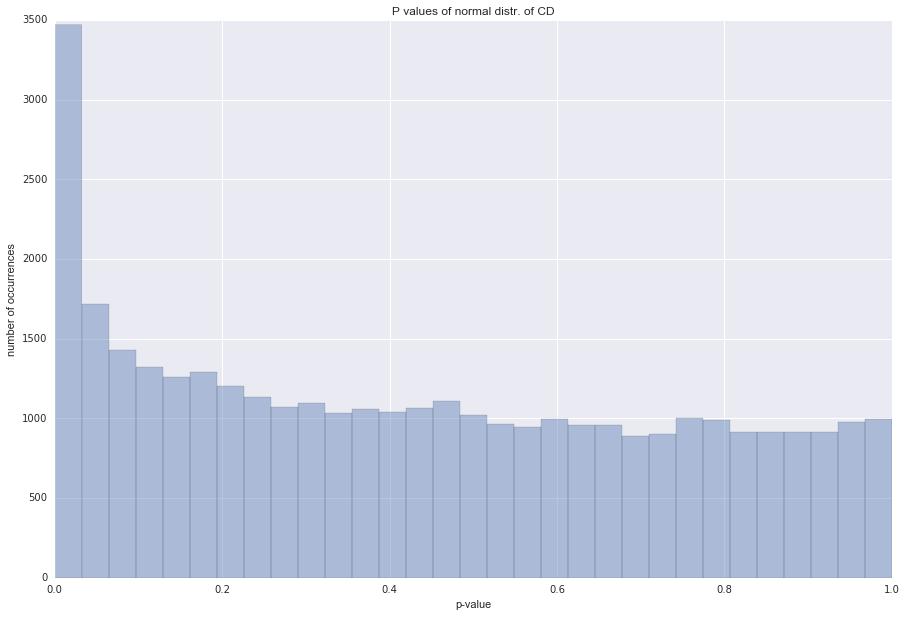

In [72]:
plt.figure(figsize=(15, 10))
sns.plt.xlabel('p-value')
sns.plt.ylabel('number of occurrences')
sns.plt.title('P values of normal distr. of CD')
sns.distplot(normal_distr_CD_p_values, kde=False)

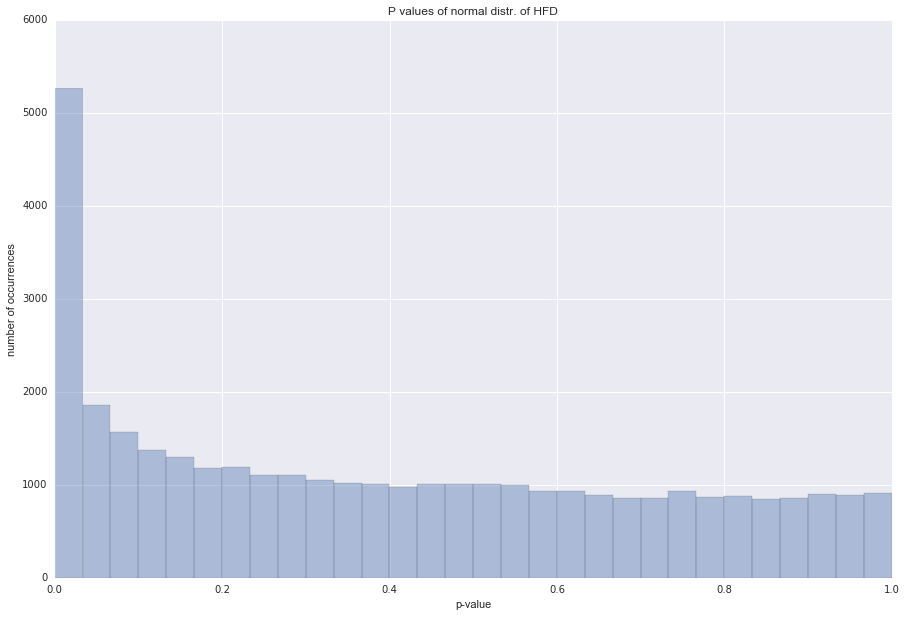

In [73]:
plt.figure(figsize=(15, 10))
sns.plt.xlabel('p-value')
sns.plt.ylabel('number of occurrences')
sns.plt.title('P values of normal distr. of HFD')
sns.distplot(normal_distr_HFD_p_values, kde=False)

#### Subsubtask 2.2.5: Write a 1-word essay about whether there is any instrinsic philosophical reason that any data follows a normal distribution

$\alpha^2$

### Subtask 2.3 Choose a suitable statistical test to assess differential expression, apply it to every row, store the results in a suitable dataframe (you may want to order the genes with respect to their p-values) and finally extract a list of differentially expressed genes (5% significance). How many differentially expressed genes do you get?

In [36]:
def test_diff_expression(data_diff_expr, alpha=0.05):
    ''' This method tests the data_diff_expr dataframe for differential expression and returns the list of 
    differentially expressed genes with significance alpha.
    
        data_diff_expr: the dataframe to test
        alpha: the significance niveau
    '''
    
    # lists to store the results
    list_of_diff_expr_genes = []
    list_of_diff_expr_genes_p_values = []
    
    # iterate over the dataframe
    for row_diff_expr in range(data_diff_expr.shape[0]):
        
        # get the current row
        gene_diff_expr = data_diff_expr.iloc[row_diff_expr]
    
        # BXD92_Liver_CD exists only for CD -> remove it 
        gene_de_dropped = gene_diff_expr.drop('BXD92_Liver_CD')

        # get the CD and HFD expression values
        sample_CD_expr_values_de = gene_de_dropped[48:]
        sample_HFD_expr_values_de = gene_de_dropped[7:47]
        
        # apply mannwhitneyu test:
        list_of_diff_expr_genes_p_values.append(stats.mannwhitneyu(sample_CD_expr_values_de, 
                                                                   sample_HFD_expr_values_de)[1])
        
        # append the results to dataframe
        list_of_diff_expr_genes.append(data_diff_expr.index[row_diff_expr])

    # create a dataframe storing the results    
    return pd.DataFrame({"gene" : list_of_diff_expr_genes,
                        "pvalue" : list_of_diff_expr_genes_p_values}) 

In [37]:
diff_expressed_results = test_diff_expression(mean_values)

In [38]:
len(diff_expressed_results)

21834

## Task 3: Multiple-testing correction

You receive an anonymous letter revealing to you that you should do multiple-testing correction, otherwise something awfully bad will happen, or not. Puzzled and shaking you embark on this endeavour.

Fredholm, your lab's vodoo priest, is convinced that applying anything else than Bonferroni correction brings death and destruction to the people on the moon. Opportunistically neglecting any potential societal consequences of your actions (technology is neutral after all and who cares about the moon anyway!) you're obsessed to try as many multiple testing procedures as possible.

Everything you may need, is most likely found here:

http://statsmodels.sourceforge.net/stable/stats.html#multiple-tests-and-multiple-comparison-procedures

### Subtask 3.1: For your official report you have to pretend to care about Bonferroni's correction (otherwise it will never pass through Fredholm's office): manually code it (do not use the statsmodels implementation for example) and store the results in a suitable dataframe. How many differentially expressed gene do you get?

In [39]:
def MHT_correction(resulting_df_2, alpha=0.1, method='bonferroni'):
    """ returns the significant genes:
    
        resulting_df: the df to analyze
        alpha: 
        method: the method to apply 
    """
    
    # get the size of the dataframe
    n = resulting_df_2.shape[0]
    
    # calculate the adjusted p-values
    if method is 'bonferroni':
        adjusted_p_value = alpha / n
    elif method is 'sidak':
        adjusted_p_value = 1 - ((1-alpha)**(float(1)/n))
        
    # get all values which p-values are smaller than the adjusted p-value    
    sig_results = resulting_df_2[resulting_df_2["pvalue"] < adjusted_p_value]
    
    return sig_results.sort_values(by = 'pvalue')

In [74]:
corrected_genes = MHT_correction(diff_expressed_results, alpha=0.05)
corrected_genes.head()

,gene,pvalue,sidak,holm-sidak,holm,simes-hochberg,hommel,fdr_bh,fdr_by,fdr_tsbh,fdr_tsbky
10247,Hus1b,7.155217e-15,1.551399e-10,1.551399e-10,1.562270e-10,1.562270e-10,1.554757e-10,1.215205e-11,1.284285e-10,5.371415e-12,5.705437e-12
1274,5330416C01Rik,7.160265e-15,1.551399e-10,1.551399e-10,1.563301e-10,1.563229e-10,1.555854e-10,1.215205e-11,1.284285e-10,5.371415e-12,5.705437e-12
7824,Glra4,7.160265e-15,1.551399e-10,1.551399e-10,1.563301e-10,1.563229e-10,1.555854e-10,1.215205e-11,1.284285e-10,5.371415e-12,5.705437e-12
3827,Caprin2,7.167842e-15,1.575640e-10,1.575423e-10,1.564812e-10,1.564812e-10,1.557500e-10,1.215205e-11,1.284285e-10,5.371415e-12,5.705437e-12
5470,D630002G06Rik,7.170369e-15,1.575640e-10,1.575423e-10,1.565292e-10,1.565148e-10,1.558050e-10,1.215205e-11,1.284285e-10,5.371415e-12,5.705437e-12


In [78]:
print("There are " + str(len(corrected_genes)) + " differentially expressed genes.")

There are 3096 differentially expressed genes.


### Subtask 3.2: Apply all multiple testing procedures you can get your hands on (except Bonferroni; now you should use statsmodels) to your uncorrected p-values and store the results in one (!) dataframe. 

In [41]:
from statsmodels.sandbox.stats.multicomp import multipletests

In [42]:
def mult_testing(testing_df):
    ''' This function applies different multiple testing procedures to the dataframe.
    
        testing_df: the dataframe to apply multiple testing to.
    '''
    
    # list of correction methods
    correction_methods = list(["sidak", "holm-sidak", "holm", "simes-hochberg", "hommel", "fdr_bh", "fdr_by", 
                          "fdr_tsbh", "fdr_tsbky"])
    
    # iterate over all correction methods
    for correction_method in correction_methods:
    
        # apply the test
        mult_test = multipletests(testing_df['pvalue'], method=correction_method)
        
        # get the adjusted p-values
        adjusted_p_values = mult_test[1]
        
        # create a new column and add the adjusted p-values
        testing_df[correction_method] = adjusted_p_values
    
    return testing_df

    

In [43]:
mult_testing_result = mult_testing(diff_expressed_results)

In [44]:
mult_testing_result.head()

,gene,pvalue,sidak,holm-sidak,holm,simes-hochberg,hommel,fdr_bh,fdr_by,fdr_tsbh,fdr_tsbky
0,39872,6.265481e-11,0.000001,0.000001,0.000001,0.000001,0.000001,2.388628e-09,2.524413e-08,1.055814e-09,1.121471e-09
1,39873,6.018315e-04,0.999998,0.999883,1.000000,0.500000,0.500000,1.932383e-03,2.042232e-02,8.541462e-04,9.072615e-04
2,39874,3.164228e-02,1.000000,1.000000,1.000000,0.500000,0.500000,5.533046e-02,5.847579e-01,2.445701e-02,2.597787e-02
3,39875,1.384384e-01,1.000000,1.000000,1.000000,0.500000,0.500000,1.868879e-01,1.000000e+00,8.260765e-02,8.774463e-02
4,39876,3.676499e-05,0.551901,0.469274,0.633498,0.500000,0.343017,1.739348e-04,1.838224e-03,7.688215e-05,8.166309e-05


### Subtask 3.3: External visual comparison of the different methods
1 Write the DE dataframe to a csv file.
2 add a row with either 'numeric' or 'factor' as the first row to describe the data schema and save the file
3 use [paco](http://parallelcoordinates.de/paco) to visualize your data in parallel coordinates
4 which of the multiple testing methods is the most stringent? What's the relation between the others?

In [79]:
# add a row with either numeric or factor as the first row

list1 = ["factor"]
list2 = ["numeric"]*10

# create a copy of the result_data_frame
paco = mult_testing_result.copy()

# add the two lists to the dataframe on pos -1
paco.loc[-1] = list1+list2

# shift all indices by one
paco.index = blabla.index + 1

# sort by index
paco = blabla.sort_index()

In [46]:
paco.to_csv("results/diff_expr_genes.csv", index=False)

<img src="figures/dayx_parallel_coords.png",width=1200,height=600>

In [47]:
print("Sidak: " + str(len(mult_testing_result[mult_testing_result['sidak'] < 0.05])))
print("Holm-Sidak: " + str(len(mult_testing_result[mult_testing_result['holm-sidak'] < 0.05])))
print("Holm: " + str(len(mult_testing_result[mult_testing_result['holm'] < 0.05])))
print("Simes-Hochberg: " + str(len(mult_testing_result[mult_testing_result['simes-hochberg'] < 0.05])))
print("Hommel: " + str(len(mult_testing_result[mult_testing_result['hommel'] < 0.05])))
print("FDR_BH: " + str(len(mult_testing_result[mult_testing_result['fdr_bh'] < 0.05])))
print("FDR_BY: " + str(len(mult_testing_result[mult_testing_result['fdr_by'] < 0.05])))
print("FDR_TSBH: " + str(len(mult_testing_result[mult_testing_result['fdr_tsbh'] < 0.05])))
print("FDR_TSBKY: " + str(len(mult_testing_result[mult_testing_result['fdr_tsbky'] < 0.05])))

Sidak: 3106
Holm-Sidak: 3181
Holm: 3164
Simes-Hochberg: 3164
Hommel: 3312
FDR_BH: 12183
FDR_BY: 7908
FDR_TSBH: 14340
FDR_TSBKY: 14144


Bonferroni is the most stringent method, returning 3096 genes. False discovery rate correction by TSBH is the least stringent method. It returns nearly the half of the dataset: 14340 genes. Three of the four FDR methods are pretty similar, because the formula differs only marginally. 

### Subtask 3.4: Select a random method applied in 3.2 and extract the corresponding list of differentially expressed genes. Is this list contain more or less genes than the list from 2.3? Does it contain more or less genes than your Bonferroni list? ;)

In [48]:
# dataframe containing the bonferroni results:
len(corrected_genes) 

3096

In [49]:
# do correction with hommel
hommel_results = multipletests(diff_expressed_results['pvalue'], method="hommel", alpha=0.05)

In [50]:
# get the number of diff. expr. genes
sum(hommel_results[0])

3312

Hommel does contain differentially expressed 3312 genes, while Bonferroni contains only 3096. 

## Task 4: Vulcano plots

Marie de la Stratonovich, the devious intellectual opponent of your (former) beloved idol Josef-Francisco Del-Marre-Doyle just received the glorious Popel prize (the first marsian scientist ever to reveive that prize) for copy-pasting the content of the following papers:

1) arXiv:1103.3434 (https://arxiv.org/abs/1103.3434)

2) http://www.ncbi.nlm.nih.gov/pubmed/23602812 (doi:10.1016/j.compbiolchem.2013.02.003)

Overwhelmed by these achievments (and motivated by your ever declining esteem for Josef-Francisco) your're immensely excited about the joyous prospect of carrying out out the following tasks:

### Subtask 4.1: Add a log2 fold change column to the data frame from 3.2 and store it as a csv file.

In [52]:
def calculate_fold_change(data_df, diff_expr_df):
    ''' calculates the fold change from data df and adds it as a column to the diff_expr_df
    
        data_df: the dataframe containing the expression values
        diff_expressed_results: the dataframe containing all genes and their corresponding p-values from multiple tests
    '''

    # fold change: log2(E_1 / E_2) with E_1, E_2 expression values

    list_fold_change = []

    # iterate over dataframe
    for index, gene_row in mean_values.iterrows():
    
        # drop the BXD92 column
        dropped_df = gene_row.drop('BXD92_Liver_CD')
        
        # get the CD and HFD expression values
        CD_expr_values_ = dropped_df[7:47]
        HFD_expr_values_ = dropped_df[48:]
    
        # calculate mean for CD:
        mean_CD = CD_expr_values_.mean()
    
        # calculate mean for HFD:
        mean_HFD = HFD_expr_values_.mean()
    
        # append fold change to list
        list_fold_change.append(np.log2(mean_CD / mean_HFD))

    # create a copy of the diff_expr_df dataframe
    copy_data_df = diff_expr_df.copy()
    
    # add the column "log2 fold change" to the dataframe and use list_fold_change als values
    copy_data_df["log2 fold change"] = list_fold_change
    
    return copy_data_df

In [53]:
fold_change_df = calculate_fold_change(mean_values, diff_expressed_results)

In [54]:
fold_change_df.to_csv("results/diff_expr_genes_fold_change.csv", index=False)

In [55]:
fold_change_df.head()

,gene,pvalue,sidak,holm-sidak,holm,simes-hochberg,hommel,fdr_bh,fdr_by,fdr_tsbh,fdr_tsbky,log2 fold change
0,39872,6.265481e-11,0.000001,0.000001,0.000001,0.000001,0.000001,2.388628e-09,2.524413e-08,1.055814e-09,1.121471e-09,-0.065622
1,39873,6.018315e-04,0.999998,0.999883,1.000000,0.500000,0.500000,1.932383e-03,2.042232e-02,8.541462e-04,9.072615e-04,-0.015217
2,39874,3.164228e-02,1.000000,1.000000,1.000000,0.500000,0.500000,5.533046e-02,5.847579e-01,2.445701e-02,2.597787e-02,0.010690
3,39875,1.384384e-01,1.000000,1.000000,1.000000,0.500000,0.500000,1.868879e-01,1.000000e+00,8.260765e-02,8.774463e-02,-0.008591
4,39876,3.676499e-05,0.551901,0.469274,0.633498,0.500000,0.343017,1.739348e-04,1.838224e-03,7.688215e-05,8.166309e-05,0.020228


### Subtask 4.2:  Implement a Vulcano plot (from scratch using matplotlib)

In [56]:
def vulcano_plot(dataframe_to_plot, title='Volcano plot'):
    ''' This function draws a vulcano plot for the given dataframe dataframe_to_plot
    
        dataframe_to_plot: the dataframe to plot
        title: the title for the figure
    '''
    
    # get the log2 fold change
    X = dataframe_to_plot['log2 fold change']
    
    # get the -log 10 pvalues
    Y = -np.log10(dataframe_to_plot['pvalue'])
    
    # set title, labels, size
    plt.figure(figsize=(15, 10))
    plt.xlabel('log2 fold change')
    plt.ylabel('-log10 p-value')
    plt.title(title)
    
    # plot figure
    plt.scatter(X,Y)
    plt.show()

### Subtask 4.3: Apply your Volcano plot implementation to the uncorrected p-values, as well as the corrected p-values from 3.4 (you should have two plots in the end ;))

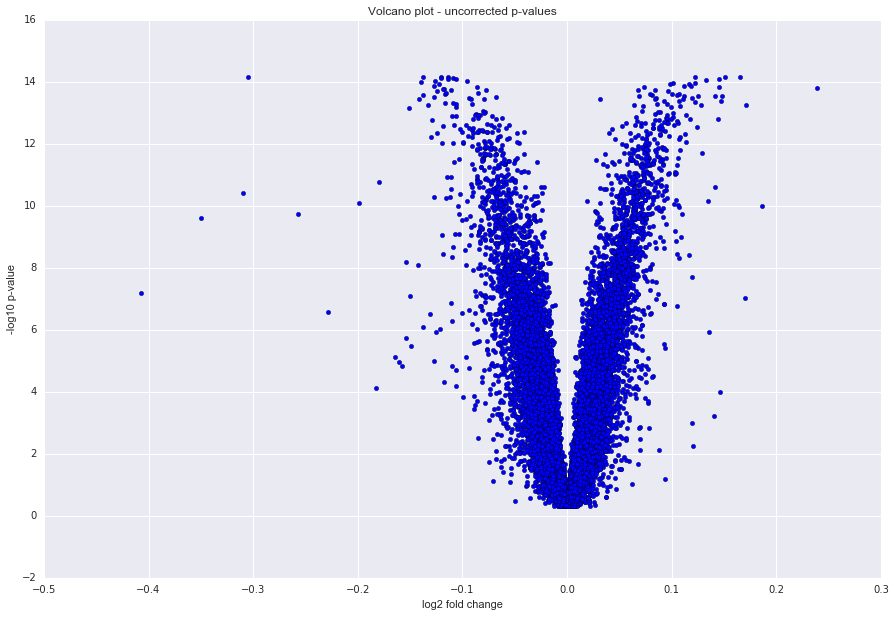

In [57]:
vulcano_plot(fold_change_df, 'Volcano plot - uncorrected p-values')

In [58]:
# do bonferroni correction on the data
fold_change_df_corrected = MHT_correction(fold_change_df, alpha=0.05)

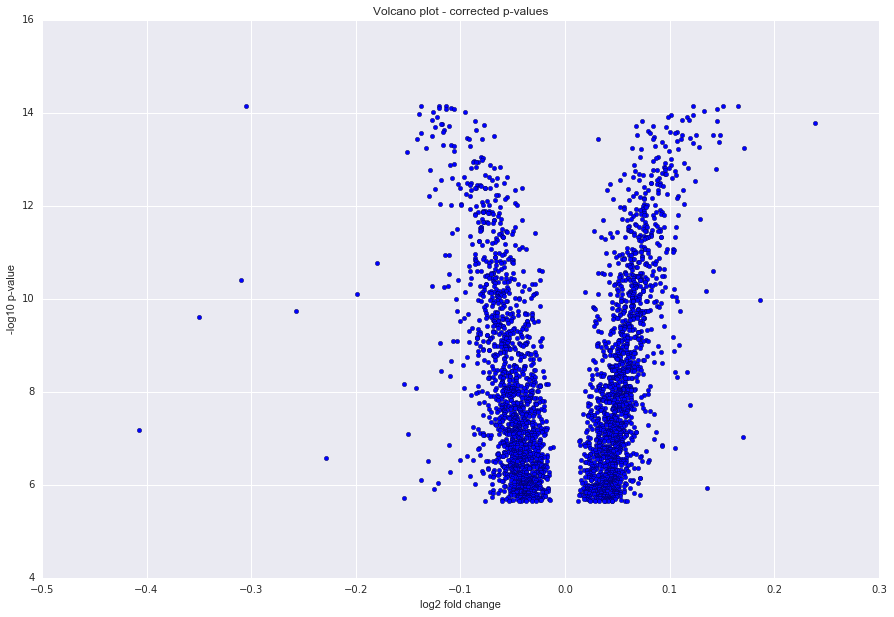

In [59]:
vulcano_plot(fold_change_df_corrected, 'Volcano plot - corrected p-values')

## Task 5: RNA-seq

There are faint rumours that some supposedly revolutionary technology could also be used to study gene expression. Find out the name of that technology and outline the most striking difference of that technology compared to microarrays from a statistical modeling point of view.

$\textit{RNA-Seq uses next-generation sequencing and can be used to measure gene expression. First the RNA
has to be isolated, purified and needs} \\ \textit{to be converted to cDNA. The cDNA can then be sequenced and
the resulting short-read sequences can be analysed.}$

TODO: most striking difference

In [ ]:
# RNA-seq: discrete data, microarrays: cont. data (Expressionswerte)